# Lezione 4

## Dario Pullia

### Esercizio 04.1

Ho implementato

### Esercizio 04.2

Spiegazione

#### Liquido

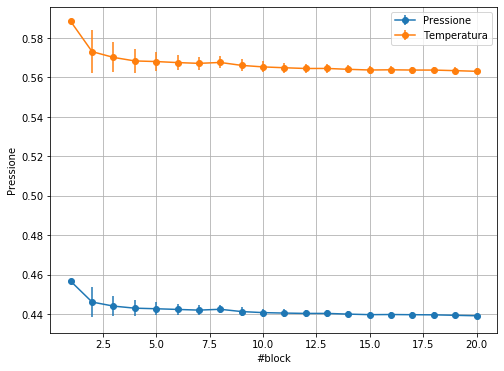

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


N=20
#ave, ave_prog, err = np.loadtxt("ex-4/MDNVE_MCNVT/output_pres.dat", usecols=(2,3,4), delimiter=' ', unpack='true')
pres, presErr= np.loadtxt("data02/liquid/output_pres.dat", usecols=(2,3), delimiter=' ', unpack='true')
Etot, EtotErr= np.loadtxt("data02/liquid/output_etot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Epot, EpotErr= np.loadtxt("data02/liquid/output_epot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Ekin, EkinErr= np.loadtxt("data02/liquid/output_ekin.dat", usecols=(2,3), delimiter=' ', unpack='true')
Temp, TempErr= np.loadtxt("data02/liquid/output_temp.dat", usecols=(2,3), delimiter=' ', unpack='true')


x = np.arange(N)+1 
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,pres, yerr=presErr, marker="o", label="Pressione")
plt.errorbar(x,Temp, yerr=TempErr, marker="o", label="Temperatura")


plt.xlabel('#block')
plt.ylabel('Pressione')
#plt.axhline(y = 14.97579, color = 'r', linestyle = '-',label="Call Price with Analytical method")
plt.grid(True)
plt.legend()
plt.show()


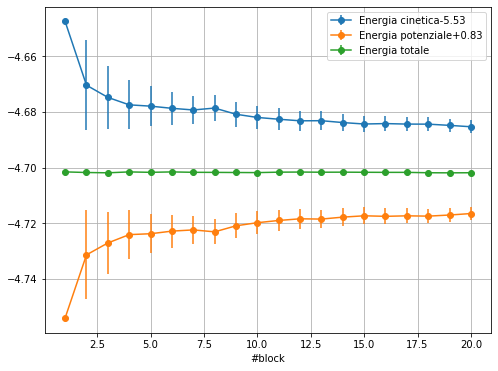

In [25]:
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,Ekin-5.53, yerr=EkinErr, marker="o", label="Energia cinetica-5.53")
plt.errorbar(x,Epot+0.83, yerr=EpotErr, marker="o", label="Energia potenziale+0.83")
plt.errorbar(x,Etot, yerr=EtotErr, marker="o", label="Energia totale")

plt.xlabel('#block')
plt.ylabel('')
#plt.axhline(y = 14.97579, color = 'r', linestyle = '-',label="Call Price with Analytical method")
plt.grid(True)
plt.legend()
plt.show()


#### Solido

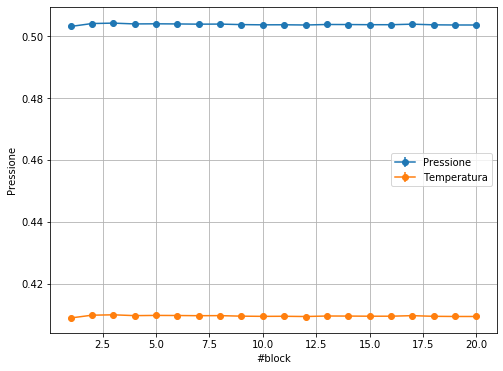

In [28]:
pres, presErr= np.loadtxt("data02/solid/output_pres.dat", usecols=(2,3), delimiter=' ', unpack='true')
Etot, EtotErr= np.loadtxt("data02/solid/output_etot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Epot, EpotErr= np.loadtxt("data02/solid/output_epot.dat", usecols=(2,3), delimiter=' ', unpack='true')
Ekin, EkinErr= np.loadtxt("data02/solid/output_ekin.dat", usecols=(2,3), delimiter=' ', unpack='true')
Temp, TempErr= np.loadtxt("data02/solid/output_temp.dat", usecols=(2,3), delimiter=' ', unpack='true')


x = np.arange(N)+1 
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,pres, yerr=presErr, marker="o", label="Pressione")
plt.errorbar(x,Temp, yerr=TempErr, marker="o", label="Temperatura")


plt.xlabel('#block')
plt.ylabel('Pressione')
#plt.axhline(y = 14.97579, color = 'r', linestyle = '-',label="Call Price with Analytical method")
plt.grid(True)
plt.legend()
plt.show()

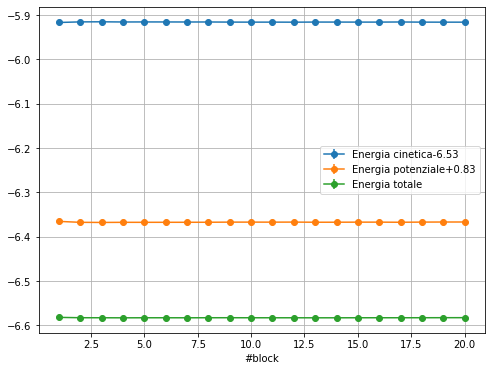

In [30]:
fig=plt.figure(figsize=(8, 6))

plt.errorbar(x,Ekin-6.53, yerr=EkinErr, marker="o", label="Energia cinetica-6.53")
plt.errorbar(x,Epot+0.83, yerr=EpotErr, marker="o", label="Energia potenziale+0.83")
plt.errorbar(x,Etot, yerr=EtotErr, marker="o", label="Energia totale")

plt.xlabel('#block')
plt.ylabel('')
#plt.axhline(y = 14.97579, color = 'r', linestyle = '-',label="Call Price with Analytical method")
plt.grid(True)
plt.legend()
plt.show()


#### Gas